In [1]:
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt

In [2]:
def costFunction(t0, t1, x, y):
    return 1/(2*len(x))* np.sum( np.square((t0+t1*x-y)))

In [3]:
def gradientDescent(t0 , t1 , x, y, alpha, maxIter=1000, tolerance=.001):
    ## initialize a (maxIter, 2) shaped 2D array to hold theta values (not an efficient thing to do)
    theta=np.zeros((maxIter,2))
    ## initialize a (maxIter,) shaped 1D array to hold J values (not an efficient thing to do)
    J=np.zeros((maxIter,))
    m=len(x)
    for i in range(maxIter):         
        t0New=t0-alpha/m*np.sum(t0+t1*x-y)  # new t0  after going down the slope      
        t1New=t1-alpha/m*np.sum((t0+t1*x-y)*x)   # new t1  after going down the slope
        theta[i,0]=t0New # save updated t0
        theta[i,1]=t1New # save updated t1
        t0Er=np.abs(t0-t0New) # compute how far t0 changed 
        t1Er=np.abs(t1-t1New) # compute how far t1 changed 
        t0=t0New ## update t0
        t1=t1New ## update t1
        J[i]=costFunction(t0, t1, x, y) ## calculate ans save cost J
        if (t0Er<tolerance) and (t1Er<tolerance):   # check for convergence
            break
    return theta, J
    

In [4]:
data=np.genfromtxt('LinearRegression_Data.csv',delimiter=',', skip_header=1) 

In [5]:
x=data[:,0]
y=data[:,1]
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [6]:
from sklearn import linear_model

In [7]:
reg=linear_model.LinearRegression()

In [8]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
reg.coef_

array([[1.19303364]])

In [10]:
reg.intercept_

array([-3.89578088])

In [11]:
t,J=gradientDescent(0, 0, x, y,.01)


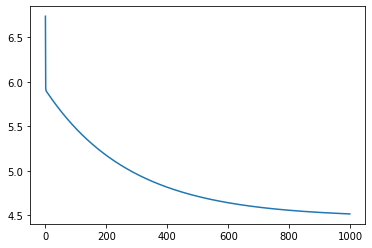

In [14]:
plt.plot(range(1000),J)

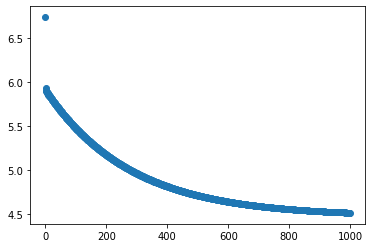

In [15]:
plt.scatter(range(1000),J)